In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# TATASTEEL = company
#.NS = NSE (India)
import yfinance as yf
data = yf.download("TATASTEEL.NS",start = "2015-01-01",end = "2024-12-31")
data.head(15)

/tmp/ipython-input-3208827253.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TATASTEEL.NS",start = "2015-01-01",end = "2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2015-01-01,28.898020,29.008768,28.372862,28.372862,26570816
2015-01-02,29.348158,29.508922,29.008770,29.008770,36043328
2015-01-05,29.773291,30.112678,29.508925,29.508925,54638866
2015-01-06,28.329994,29.580370,28.176377,29.580370,64767961
2015-01-07,27.786970,28.422879,27.408286,28.422879,49846923
2015-01-08,28.219248,28.344286,27.908440,28.151369,33271702
2015-01-09,28.555058,28.930171,28.229960,28.722965,53120660
2015-01-12,28.347858,28.544345,28.079920,28.544345,28244762


Text(0.5, 1.0, 'Closing Price Trend')

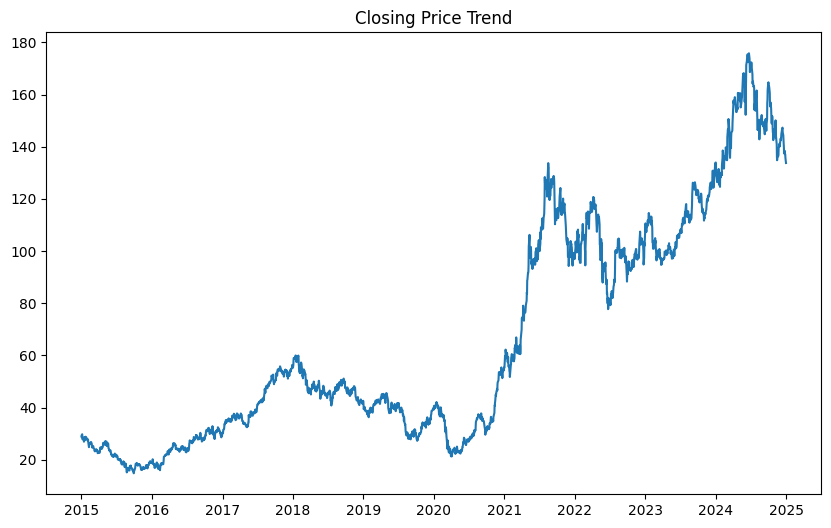

In [87]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title("Closing Price Trend")

**Classification Problem** : Buy(+1) or Sell(-1) the Stock.

**open-close** : It shows how much the stock price changed from the start of the day to the end of the day.                              

**High-Low**: It shows the price range or movement of the stock dring that day,showing how much the price fluctuated.

In [88]:
data['open-close'] = data['Open'] - data['Close']  # positive → price decrease , negative → price increase
data['High-Low'] = data['High'] - data['Low'] # large value means more price flucuate .
data = data.dropna()

In [89]:
X = data[['open-close','High-Low']] # for double column [[]]
X.head()

Price,open-close,High-Low
Ticker,,
Date,,
2015-01-01,-0.525158,0.635906
2015-01-02,-0.339388,0.500151
2015-01-05,-0.264366,0.603753
2015-01-06,1.250376,1.403993
2015-01-07,0.635909,1.014593


Intention is to store (+1) to buy stock ,(-1) to sell stock . This store target variable Y for classification task. our task is to predict Y

In [90]:
Y = np.where(data['Close'].shift(-1) > data['Close'],+1,-1) # shift(-1) : next day value
Y= Y.ravel()  # force 1-D array
print(Y)




[ 1  1 -1 ... -1 -1 -1]


In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=14)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit

knn = KNeighborsClassifier()
# using Grid search to find best params
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
tcsv = TimeSeriesSplit(n_splits = 5)

model = GridSearchCV(knn,params,cv=tcsv)
# fit the model
model.fit(X_train,Y_train)

# accuracy score for training
predict_traning = model.predict(X_train) # predicting Y labels
train_accuracy = accuracy_score(Y_train,predict_traning)

# accuracy score for  testing
predict_testing = model.predict(X_test) # predicting Y labels
test_accuracy = accuracy_score(Y_test,predict_testing)

print(f"The training accuracy is {train_accuracy:.2f}")
print(f"The testing accuracy is {test_accuracy:.2f}")




The training accuracy is 0.67
The testing accuracy is 0.50


In [93]:
predict_testing = model.predict(X_test)

In [94]:
print(Y_test.shape)
print(predict_testing.shape)

(494,)
(494,)


In [95]:
actual_predicted_data = pd.DataFrame({'Actual Class':Y_test,'Predicted Class':predict_testing})
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,-1
1,-1,-1
2,1,1
3,-1,-1
4,-1,1
5,1,1
6,-1,1
7,-1,-1
8,-1,-1
9,1,1


**Implemantation of KNN Regressor**

In [96]:
# Y = data['Close'].values
Y = np.array(data['Close'])
Y = Y.ravel()
Y

array([ 28.89801979,  29.34815788,  29.77329063, ..., 137.16131592,
       135.74436951, 133.76063538])

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import train_test_split
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg = train_test_split(X,Y,test_size=0.20,random_state=14)

# Now we will predict Close value

knn_reg = KNeighborsRegressor()
# using Grid search to find best params
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
tcsv = TimeSeriesSplit(n_splits = 5)

model_reg = GridSearchCV(knn_reg,params,cv=tcsv)
# fit the model
model_reg.fit(X_train_reg,Y_train_reg)

predict_Close = model_reg.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(Y_test_reg,predict_Close))
rscore = r2_score(Y_test_reg,predict_Close)

print(rmse)
print(rscore)






27.90769121560291
0.6057364084792861


**RMSE:** This means that, on average, the model’s predictions differ from the actual values by about 27.9 units.

**R^2 Score:** An R² value of 0.606 means the model explains approximately 60.6% of the variation in the data.

This suggests the model has moderate predictive power.

In [98]:
rms = np.sqrt(np.mean(np.power((np.array(Y_test_reg)-np.array(predict_Close)),2)))
print(rms)

27.90769121560291


In [99]:
print(Y_test_reg.shape)
print(predict_Close.shape)

(494,)
(494,)


In [100]:
actual_predicted_close = pd.DataFrame({'Actual Class': Y_test_reg,'Predicted Class':predict_Close})
actual_predicted_close.head(10)

,Actual Class,Predicted Class
0,119.514549,107.568321
1,29.444975,39.383068
2,87.305740,83.989183
3,117.846695,115.308079
4,133.963882,82.235676
5,126.156891,110.932793
6,31.214148,40.826159
7,133.724396,136.350850
8,162.949921,123.490442
9,18.151785,32.029889
